In [438]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Any results you write to the current directory are saved as output.

['heart.csv']


In [225]:
dataset = pd.read_csv("../input/heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Total data

In [226]:
print('Total Rows:',len(dataset))
print('Total Columns:',len(dataset.columns))

Total Rows: 303
Total Columns: 14


# Column Name

In [227]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [228]:
print('Total Patients with Heart Disease:',len(dataset[dataset['target'] ==1]))
print('% of Patients with Heart Disease:',round(len(dataset[dataset['target'] ==1])/len(dataset)*100,2))

Total Patients with Heart Disease: 165
% of Patients with Heart Disease: 54.46


Lets us check for some null values in the dataset

In [229]:
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

So we see that their is no null value in the dataset

In [230]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


This gives us general statistics for all the columns in our dataset. 

In [231]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

So we see that all of the columns have int64 as dataypes

Lets look at the distribution fo each of the columns in the dataset

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


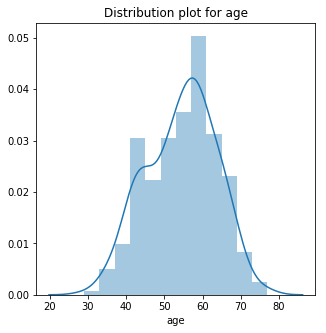

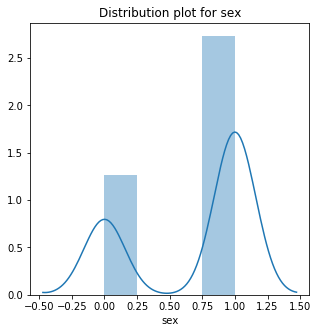

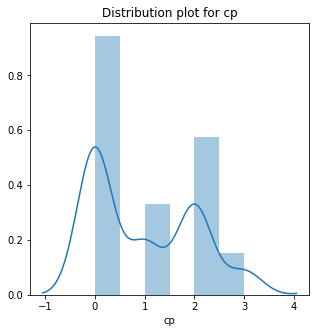

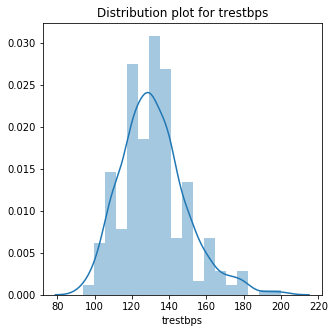

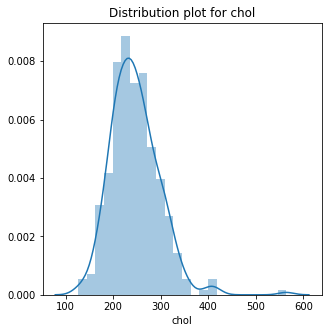

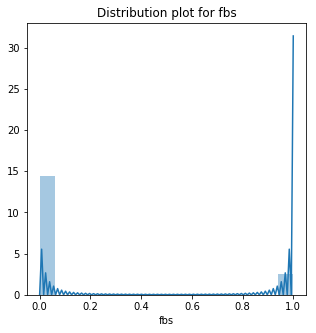

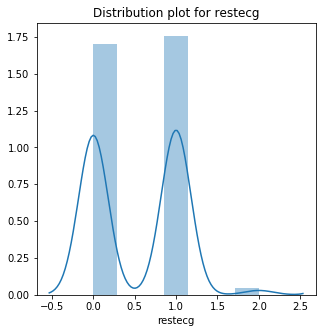

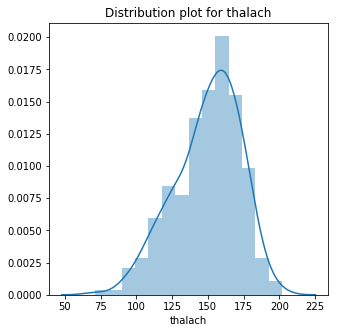

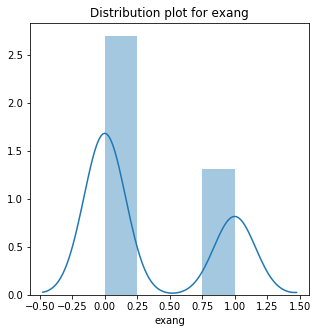

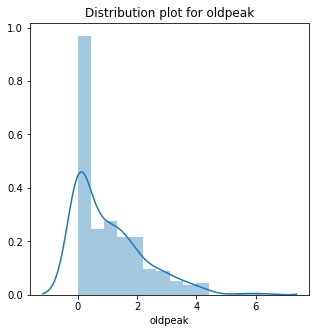

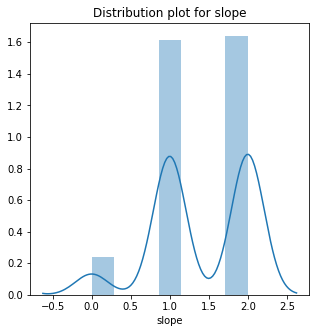

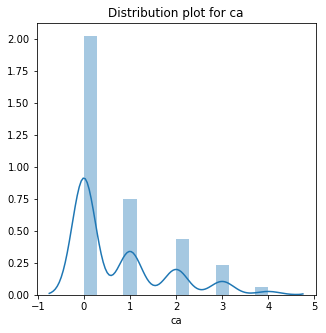

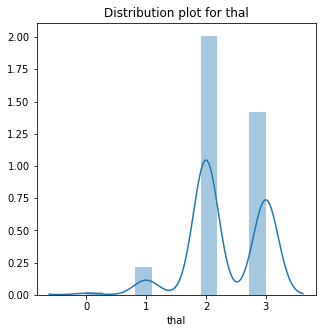

In [232]:
plt.rcParams['figure.figsize'] = 5,5
for columns in dataset.columns:
    if(columns != 'target'):
        sns.distplot(dataset[columns])
        plt.title('Distribution plot for %s'%columns)
        plt.show()

We now get an idea of the distribution of each of the columns. We see that some of the columns have discrete values, which means we have an option to convert them into categorical variables and see if it improves the model. We would do this later on , first we will go with discrete values.

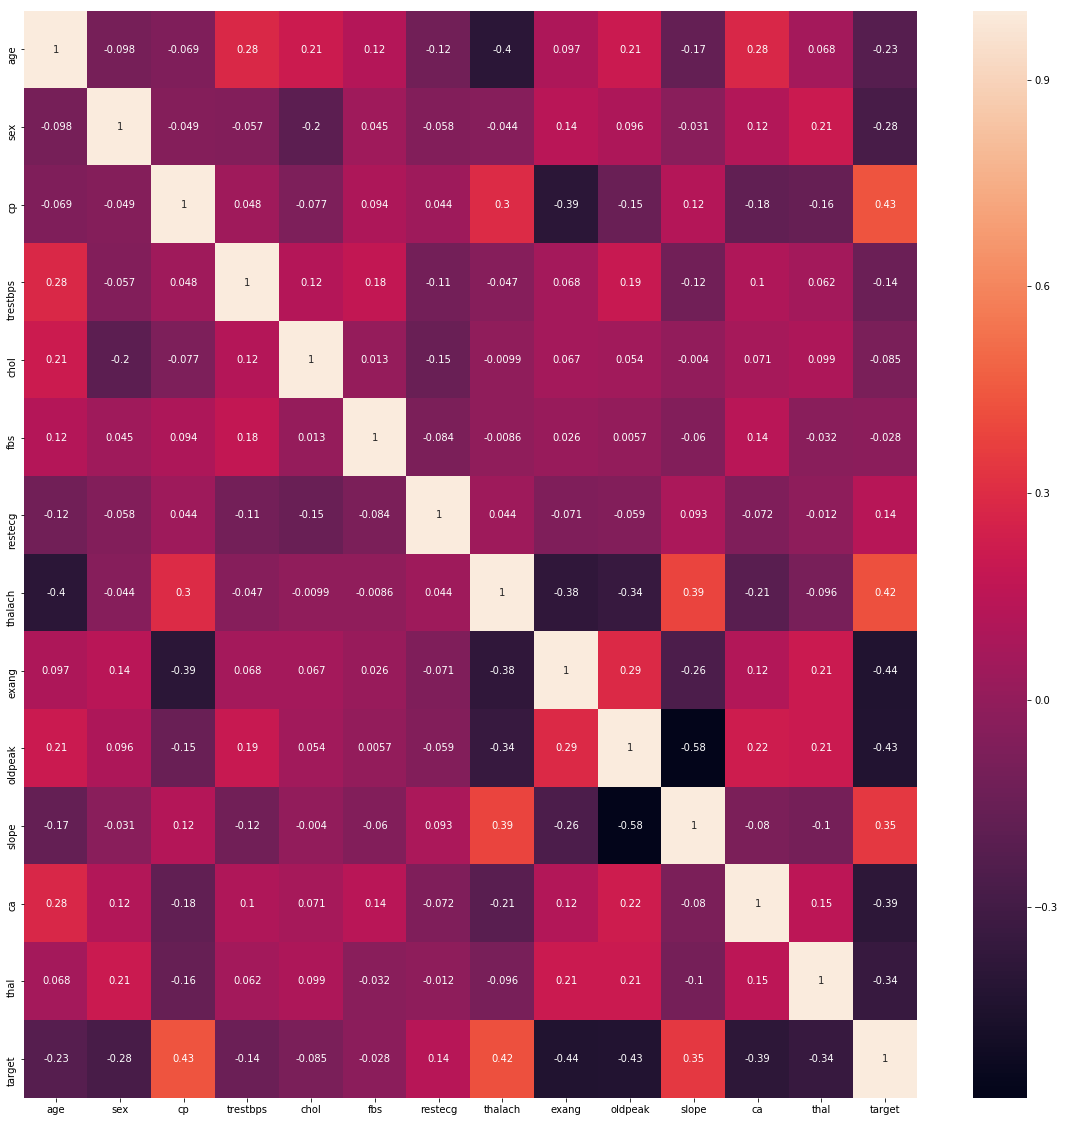

In [233]:
plt.rcParams['figure.figsize'] = 20,20
corr = dataset.corr()
sns.heatmap(corr,annot = True)


This gives us an idea about how the variables are correlated with each other and with the target.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


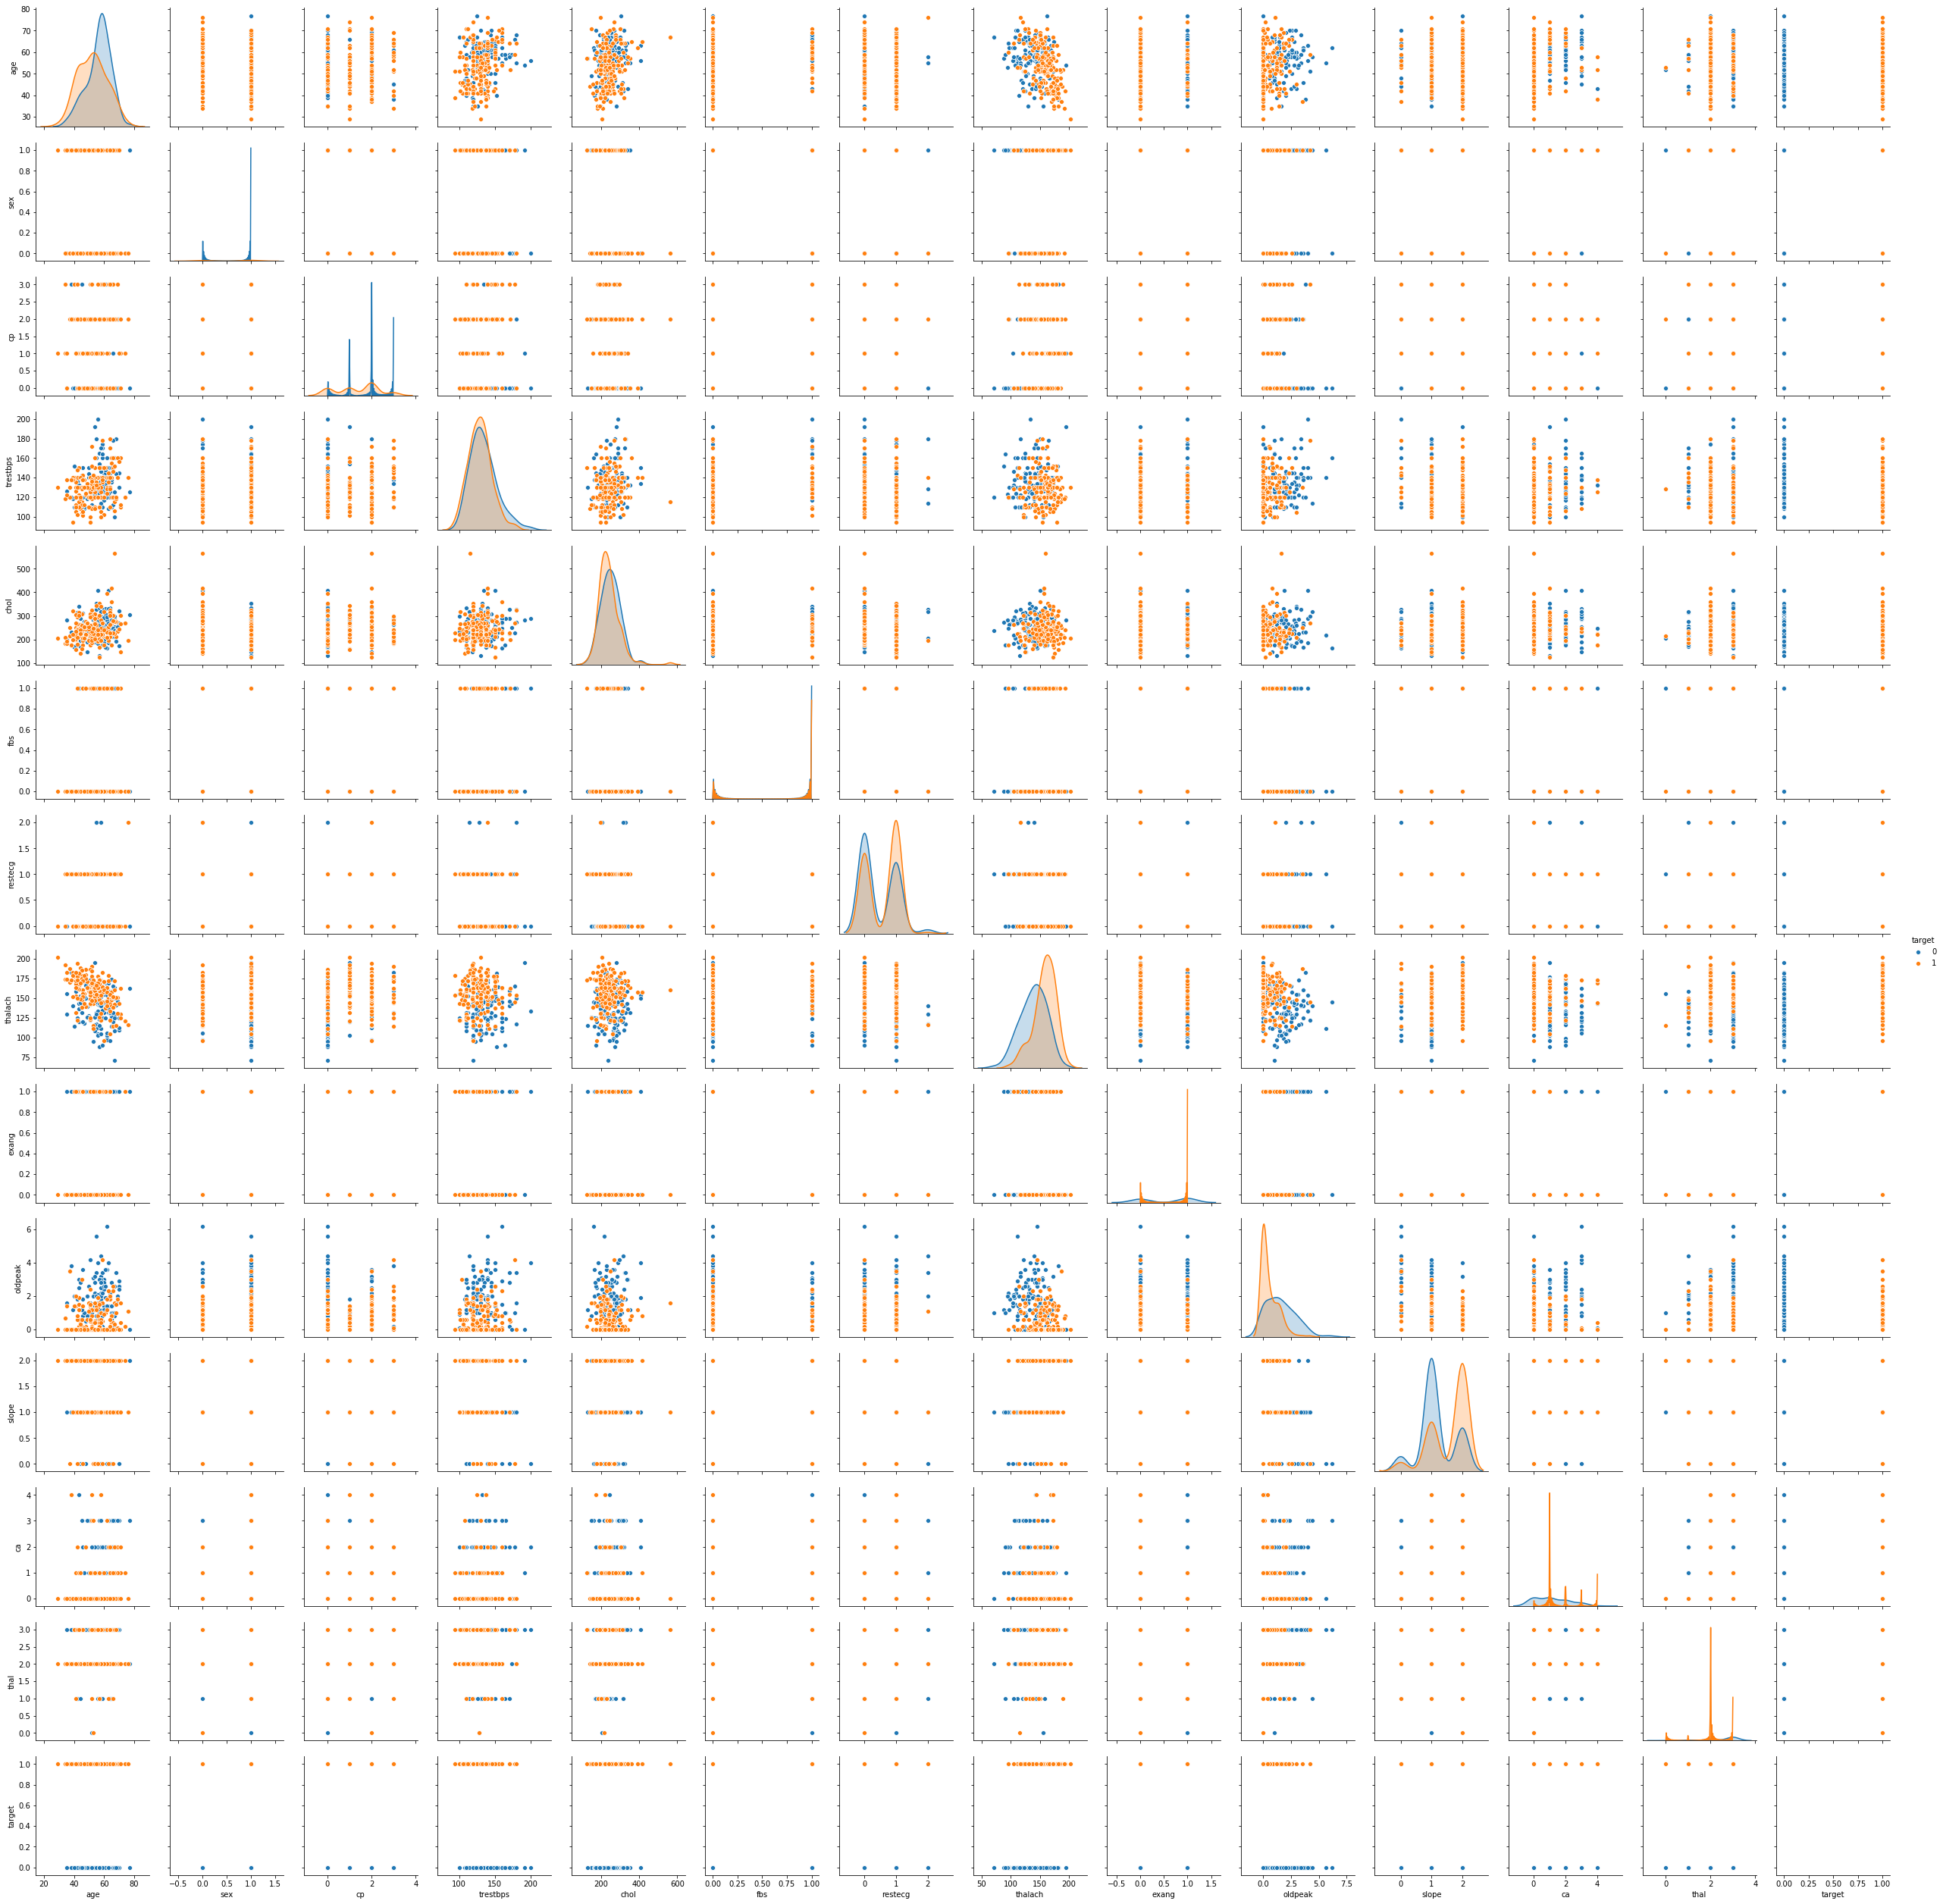

In [234]:
sns.pairplot(dataset,vars = dataset.columns,hue = 'target')

Lets now run a simple Logistic model and check for the model performance and try to improve the model thereafter.

In [235]:
X = dataset.iloc[:,:-1].values
Y = dataset['target']
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 27)


# **Logistic Regression**

## Training the model

In [236]:
model_logistic = LogisticRegression(random_state = 0,solver = 'liblinear')
model_logistic.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [237]:
pred_logistic = model_logistic.predict(test_X)

## Checking Accuracy

Precision Score :  0.8857142857142857
Recall Score :  0.9117647058823529
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

Accuracy for Test:  88.52
Accuracy for Train:  83.06


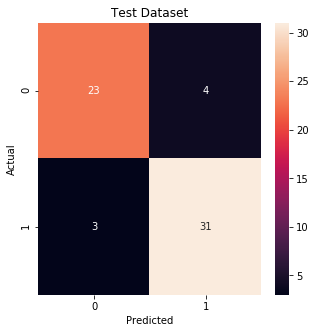

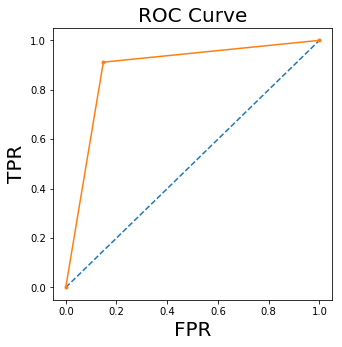

In [238]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_logistic))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_logistic))

#Confusion Matrix
cm_logistic = confusion_matrix(test_Y,pred_logistic)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_logistic))
#Accuracy
print("Accuracy for Test: ",round((cm_logistic[0,0] + cm_logistic[1,1])/
      (cm_logistic[0,0] + cm_logistic[1,1] + cm_logistic[0,1] + cm_logistic[1,0])*100,2))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_logistic,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_logistic_train = model_logistic.predict(train_X)
cm = confusion_matrix(train_Y,pred_logistic_train)
print("Accuracy for Train: ",round((cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])*100,2))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_logistic)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()


So we get a nice performance here and are able to predict with an accuracy of 88% on the test data.

We will now normalize all the data in our dataset and see if we get a better result.

# **Logistic Regression - Normalized**

## Scaling our data

In [239]:
scaler_X = StandardScaler()
train_X_scaled = scaler_X.fit_transform(train_X) # scale the data for train_X
test_X_scaled = scaler_X.transform(test_X)

## Training the model

In [240]:
model_logistic_scaled = LogisticRegression(random_state = 0,solver = 'liblinear')
model_logistic_scaled.fit(train_X_scaled,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [241]:
pred_logistic_scaled = model_logistic_scaled.predict(test_X_scaled)

## Checking for Accuracy

Precision Score :  0.9117647058823529
Recall Score :  0.9117647058823529
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

   micro avg       0.90      0.90      0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy for Test:  90.16
Accuracy for Train:  83.47


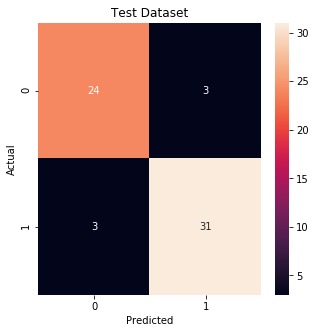

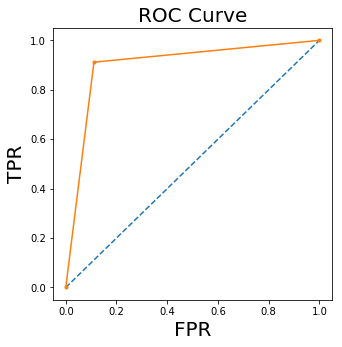

In [242]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_logistic_scaled))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_logistic_scaled))

#Confusion Matrix
cm_logistic_scaled = confusion_matrix(test_Y,pred_logistic_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_logistic_scaled))
#Accuracy
print("Accuracy for Test: ",round((cm_logistic_scaled[0,0] + cm_logistic_scaled[1,1])/
      (cm_logistic_scaled[0,0] + cm_logistic_scaled[1,1] + cm_logistic_scaled[0,1] + cm_logistic_scaled[1,0])*100,2))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_logistic_scaled,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_logistic_train_scaled = model_logistic_scaled.predict(train_X_scaled)
cm = confusion_matrix(train_Y,pred_logistic_train_scaled)
print("Accuracy for Train: ",round((cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])*100,2))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_logistic_scaled)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()


As expected we got a better results for both test and train dataset.

# Logistic Regression - Categorical Variables

We will now convert few of the variables into categorical variables. Variables like sex,cp,fbs,restecg,exang,slope,ca and thal

## Creating Categorical variables

In [243]:
dataset_onehot = dataset.copy()
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','target'])
dataset_onehot.drop(['sex_1','cp_3','fbs_1','restecg_2','exang_1','slope_2','ca_4','thal_3','target_0'],axis = 1,inplace = True)
print(dataset_onehot.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'cp_0',
       'cp_1', 'cp_2', 'fbs_0', 'restecg_0', 'restecg_1', 'exang_0', 'slope_0',
       'slope_1', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_0', 'thal_1', 'thal_2',
       'target_1'],
      dtype='object')


## Splitting Dataset

In [244]:
X_onehot = dataset_onehot.iloc[:,:-1].values
Y_onehot = dataset_onehot['target_1']
train_X_onehot,test_X_onehot,train_Y_onehot,test_Y_onehot = train_test_split(X_onehot,Y_onehot,test_size = 0.2,random_state = 27)

## Training the model 

In [245]:
model_logistic_onehot = LogisticRegression(random_state = 0,solver = 'liblinear')
model_logistic_onehot.fit(train_X_onehot,train_Y_onehot)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [246]:
pred_logistic_onehot = model_logistic_onehot.predict(test_X_onehot)

## Checking for Accuracy

Precision Score :  0.9354838709677419
Recall Score :  0.8529411764705882
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.94      0.85      0.89        34

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy for Test:  88.52
Accuracy for Train:  85.95


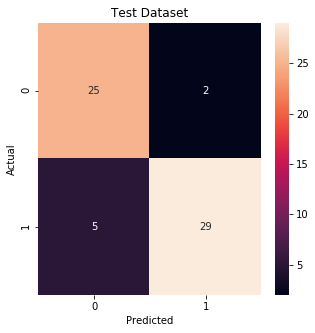

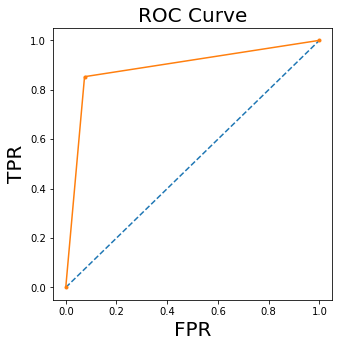

In [247]:
#Precision
print("Precision Score : ",precision_score(test_Y_onehot,pred_logistic_onehot))

#Recall
print("Recall Score : ",recall_score(test_Y_onehot,pred_logistic_onehot))

#Confusion Matrix
cm_logistic_onehot = confusion_matrix(test_Y_onehot,pred_logistic_onehot)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y_onehot,pred_logistic_onehot))
#Accuracy
print("Accuracy for Test: ",round((cm_logistic_onehot[0,0] + cm_logistic_onehot[1,1])/
      (cm_logistic_onehot[0,0] + cm_logistic_onehot[1,1] + cm_logistic_onehot[0,1] + cm_logistic_onehot[1,0])*100,2))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_logistic_onehot,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_logistic_train_onehot = model_logistic_onehot.predict(train_X_onehot)
cm = confusion_matrix(train_Y_onehot,pred_logistic_train_onehot)
print("Accuracy for Train: ",round((cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])*100,2))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y_onehot,pred_logistic_onehot)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()


This has increased its accuracy in training dataset. Where as the overall accuracy has decreased. The precision has increase but the recall has decreased.

Let us now look at other algorithms where we once take the normalized data and once we take the categorical data and see how the output differs

# **Support Vector Classificaiton - Normalized**

## Finding the optimal Parameters

### Setting up parameters

In [248]:
parameters = {
            'kernel' : ['rbf','linear'],
            'C' : [0.1,1,10,100],
            'gamma' : [1,0.1,0.01,0.001],
            'random_state' : [0]
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [249]:
model_svc_grid = SVC()
grid = GridSearchCV(model_svc_grid, parameters, scoring=scorer,cv = 10)
grid = grid.fit(train_X_scaled,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Best Parameters

In [250]:
 grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Training the Model

In [251]:
model_svc_scaled = SVC(kernel = 'rbf',random_state = 0 , C = 10,gamma = 0.01)
model_svc_scaled.fit(train_X_scaled,train_Y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Prediction

In [252]:
pred_svc_scaled = model_svc_scaled.predict(test_X_scaled)

## Checking the Accuracy

Precision Score :  0.8787878787878788
Recall Score :  0.8529411764705882
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy for Test:  0.8524590163934426
Accuracy for Train:  0.8842975206611571


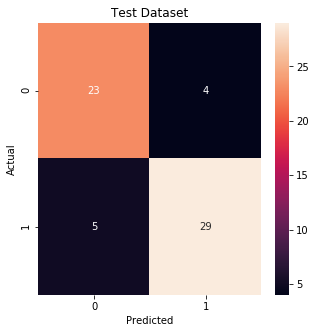

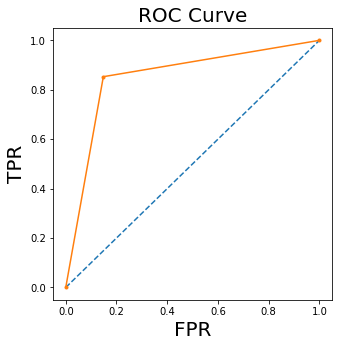

In [253]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_svc_scaled))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_svc_scaled))

#Confusion Matrix
cm_svc_scaled = confusion_matrix(test_Y,pred_svc_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_svc_scaled))
#Accuracy
print("Accuracy for Test: ",(cm_svc_scaled[0,0] + cm_svc_scaled[1,1])/
      (cm_svc_scaled[0,0] + cm_svc_scaled[1,1] + cm_svc_scaled[0,1] + cm_svc_scaled[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_svc_scaled,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_svc_scaled_train = model_svc_scaled.predict(train_X_scaled)
cm = confusion_matrix(train_Y,pred_svc_scaled_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_svc_scaled)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **Support Vector Classification - Categorical Variables**

## Finding the Optimal Parameters

### Setting up Parameters

In [275]:
parameters = {
            'kernel' : ['rbf'],
            'C' : [0.1,1,10,100],
            'gamma' : [1,0.1,0.01,0.001],
            'random_state' : [0]
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [286]:
model_svc_grid = SVC()
grid = GridSearchCV(model_svc_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_onehot,train_Y_onehot)
# parameters

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


   ### Best Parameters

In [287]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Training the Model

In [288]:
model_svc_onehot = SVC(kernel = 'rbf',random_state = 0 , C = 1,gamma = 0.001)
model_svc_onehot.fit(train_X_onehot,train_Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Prediction

In [289]:
pred_svc_onehot = model_svc_onehot.predict(test_X_onehot)

Precision Score :  0.6388888888888888
Recall Score :  0.6764705882352942
Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.52      0.54        27
           1       0.64      0.68      0.66        34

   micro avg       0.61      0.61      0.61        61
   macro avg       0.60      0.60      0.60        61
weighted avg       0.60      0.61      0.60        61

Accuracy for Test:  0.6065573770491803
Accuracy for Train:  0.7975206611570248


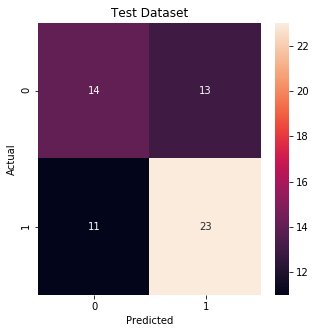

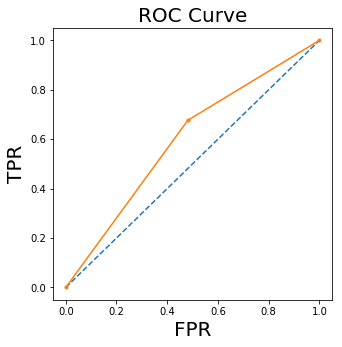

In [290]:
#Precision
print("Precision Score : ",precision_score(test_Y_onehot,pred_svc_onehot))

#Recall
print("Recall Score : ",recall_score(test_Y_onehot,pred_svc_onehot))

#Confusion Matrix
cm_svc_onehot = confusion_matrix(test_Y_onehot,pred_svc_onehot)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y_onehot,pred_svc_onehot))
#Accuracy
print("Accuracy for Test: ",(cm_svc_onehot[0,0] + cm_svc_onehot[1,1])/
      (cm_svc_onehot[0,0] + cm_svc_onehot[1,1] + cm_svc_onehot[0,1] + cm_svc_onehot[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_svc_onehot,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_svc_onehot_train = model_svc_onehot.predict(train_X_onehot)
cm = confusion_matrix(train_Y,pred_svc_onehot_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y_onehot,pred_svc_onehot)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

As we can see this clearly did not perform well and is the worst model till now.

# **Naive Bayes Classification - Normalized**

## Training the Model

In [303]:
model_nb_scaled = GaussianNB()
model_nb_scaled.fit(train_X_scaled,train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

## Prediction

In [305]:
pred_nb_scaled = model_nb_scaled.predict(test_X_scaled)

## Checking for Accuracy

Precision Score :  0.875
Recall Score :  0.8235294117647058
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

Accuracy for Test:  0.8360655737704918
Accuracy for Train:  0.8140495867768595


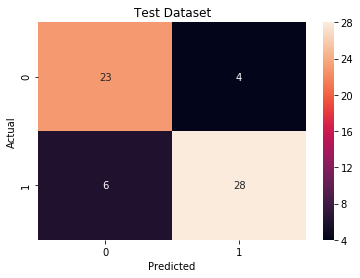

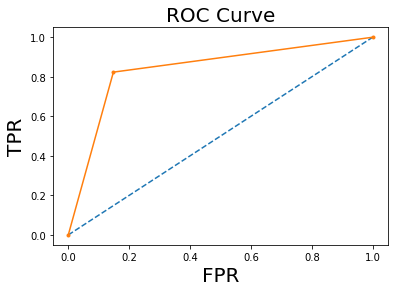

In [306]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_nb_scaled))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_nb_scaled))

#Confusion Matrix
cm_nb_scaled = confusion_matrix(test_Y,pred_nb_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_nb_scaled))
#Accuracy
print("Accuracy for Test: ",(cm_nb_scaled[0,0] + cm_nb_scaled[1,1])/
      (cm_nb_scaled[0,0] + cm_nb_scaled[1,1] + cm_nb_scaled[0,1] + cm_nb_scaled[1,0]))

sns.heatmap(cm_nb_scaled,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_nb_train_scaled = model_nb_scaled.predict(train_X_scaled)
cm = confusion_matrix(train_Y,pred_nb_train_scaled)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_nb_scaled)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **Naive Bayes Classification - Categorical Variables**

## Training the Model

In [307]:
model_nb_onehot = GaussianNB()
model_nb_onehot.fit(train_X_onehot,train_Y_onehot)

GaussianNB(priors=None, var_smoothing=1e-09)

## Prediction

In [308]:
pred_nb_onehot = model_nb_onehot.predict(test_X_onehot)

## Checking for Accuracy

Precision Score :  0.8846153846153846
Recall Score :  0.6764705882352942
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
           1       0.88      0.68      0.77        34

   micro avg       0.77      0.77      0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.80      0.77      0.77        61

Accuracy for Test:  0.8360655737704918
Accuracy for Train:  0.8016528925619835


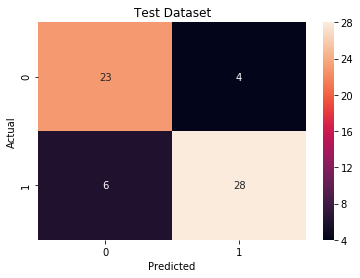

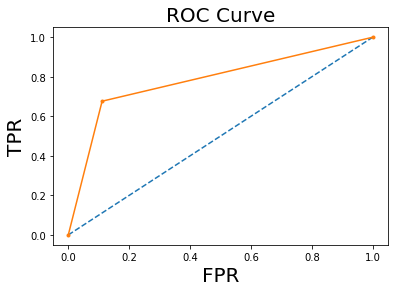

In [309]:
#Precision
print("Precision Score : ",precision_score(test_Y_onehot,pred_nb_onehot))

#Recall
print("Recall Score : ",recall_score(test_Y_onehot,pred_nb_onehot))

#Confusion Matrix
cm_nb_onehot = confusion_matrix(test_Y,pred_nb_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y_onehot,pred_nb_onehot))
#Accuracy
print("Accuracy for Test: ",(cm_nb_onehot[0,0] + cm_nb_onehot[1,1])/
      (cm_nb_onehot[0,0] + cm_nb_onehot[1,1] + cm_nb_onehot[0,1] + cm_nb_onehot[1,0]))

sns.heatmap(cm_nb_onehot,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_nb_train_onehot = model_nb_onehot.predict(train_X_onehot)
cm = confusion_matrix(train_Y_onehot,pred_nb_train_onehot)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y_onehot,pred_nb_onehot)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **Decision Tree Classification - Normalized**

## Finding Optimal Parameter

### Setting up Parameters

In [317]:
parameters = {
            'criterion' : ['entropy'],
            'max_features' : [1,2,3,4,5,6,7,8,9,10,11,12,13],
            'max_depth' : [1,2,3,4,5,6,7,8,9,10],
            'min_samples_split' : [5,10,15],
            'random_state' : [0]
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [318]:
model_dtree_grid = DecisionTreeClassifier()
grid = GridSearchCV(model_dtree_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_scaled,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Best Parameters

In [319]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Training the Model

In [338]:
model_dtree_scaled = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_features = 10,max_depth = 3
                                    ,min_samples_split = 5)
model_dtree_scaled.fit(train_X_scaled,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Prediction

In [339]:
pred_dtree_scaled = model_dtree_scaled.predict(test_X_scaled)

## Checking for Accuracy

Precision Score :  0.9032258064516129
Recall Score :  0.8235294117647058
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Accuracy for Test:  0.8524590163934426
Accuracy for Train:  0.8429752066115702


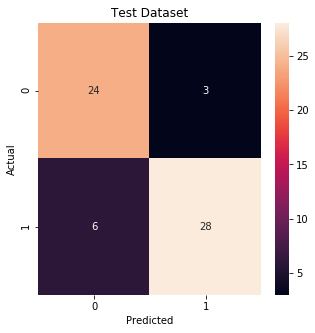

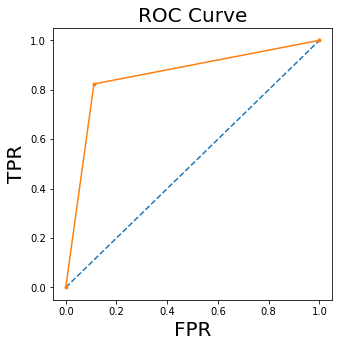

In [340]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_dtree_scaled))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_dtree_scaled))

#Confusion Matrix
cm_dtree_scaled = confusion_matrix(test_Y,pred_dtree_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_dtree_scaled))
#Accuracy
print("Accuracy for Test: ",(cm_dtree_scaled[0,0] + cm_dtree_scaled[1,1])/
      (cm_dtree_scaled[0,0] + cm_dtree_scaled[1,1] + cm_dtree_scaled[0,1] + cm_dtree_scaled[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_dtree_scaled,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_dtree_train_scaled = model_dtree_scaled.predict(train_X_scaled)
cm = confusion_matrix(train_Y,pred_dtree_train_scaled)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_dtree_scaled)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **Decision Tree Classification - Categorical Variables**

## Finding Optimal Parameter

### Setting up Parameters

In [352]:
parameters = {
            'criterion' : ['entropy'],
            'max_features' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],
            'max_depth' : [1,2,3,4,5,6,7,8,9,10],
            'min_samples_split' : [5,10,15],
            'random_state' : [0]
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [353]:
model_dtree_grid = DecisionTreeClassifier()
grid = GridSearchCV(model_dtree_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_onehot,train_Y_onehot)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Best Parameter

In [354]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

## Training the model

In [355]:
model_dtree_onehot = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_features = 8,max_depth = 4
                                    ,min_samples_split = 15)
model_dtree_onehot.fit(train_X_onehot,train_Y_onehot)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

## Prediction

In [357]:
pred_dtree_onehot = model_dtree_onehot.predict(test_X_onehot)

In [358]:
## Checking for Accuracy

Precision Score :  0.8484848484848485
Recall Score :  0.8235294117647058
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy for Test:  0.819672131147541
Accuracy for Train:  0.8429752066115702


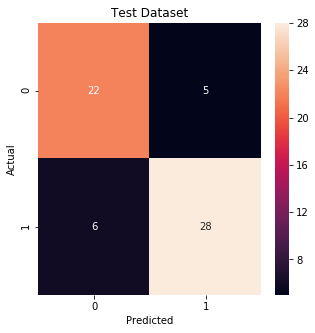

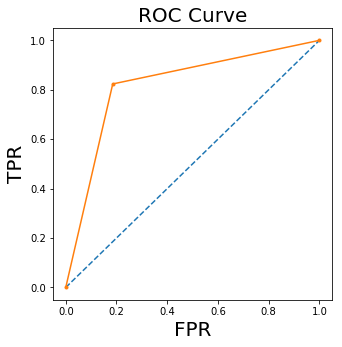

In [359]:
#Precision
print("Precision Score : ",precision_score(test_Y_onehot,pred_dtree_onehot))

#Recall
print("Recall Score : ",recall_score(test_Y_onehot,pred_dtree_onehot))

#Confusion Matrix
cm_dtree_onehot = confusion_matrix(test_Y_onehot,pred_dtree_onehot)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y_onehot,pred_dtree_onehot))
#Accuracy
print("Accuracy for Test: ",(cm_dtree_onehot[0,0] + cm_dtree_onehot[1,1])/
      (cm_dtree_onehot[0,0] + cm_dtree_onehot[1,1] + cm_dtree_onehot[0,1] + cm_dtree_onehot[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_dtree_onehot,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_dtree_train_onehot = model_dtree_onehot.predict(train_X_onehot)
cm = confusion_matrix(train_Y_onehot,pred_dtree_train_onehot)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y_onehot,pred_dtree_onehot)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **Random Forest Classification - Normalized**

## Finding Optimal Parameters

### Setting up Parameters

In [391]:
parameters = {
            'criterion' : ['entropy'],
            'max_features' : [9,10,11,12],
            'max_depth' : [3,4,5],
            'min_samples_split' : [5,10,15],
            'n_estimators' : [100,200,300,400],
            'random_state' : [0]
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [392]:
model_rforest_grid = RandomForestClassifier()
grid = GridSearchCV(model_rforest_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_scaled,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    ### Best Parameters

In [393]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Training the model

In [409]:
# Changed some parameters from what we got from Grid Search since they gave the best accuracy score on train and hence overfitting the data.
# I changed parameters to optimize the Recall Score, Precision Score and Accuracy on Test data

model_rforest_scaled = RandomForestClassifier(n_estimators = 500,random_state = 0,max_depth = 3
                                      ,max_features = 12,min_samples_split = 5, 
                                       criterion = 'entropy')
model_rforest_scaled.fit(train_X_scaled,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Prediction

In [410]:
pred_rforest_scaled = model_rforest_scaled.predict(test_X_scaled)

## Checking the Accuracy

Precision Score :  0.8823529411764706
Recall Score :  0.8823529411764706
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy for Test:  0.8688524590163934
Accuracy for Train:  0.8760330578512396


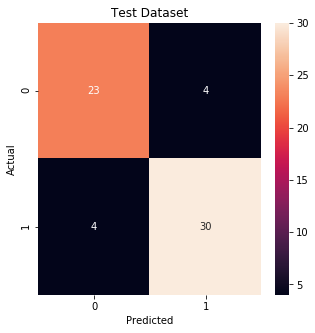

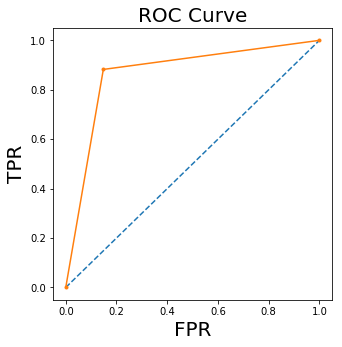

In [411]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_rforest_scaled))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_rforest_scaled))

#Confusion Matrix
cm_rforest_scaled = confusion_matrix(test_Y,pred_rforest_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_rforest_scaled))
#Accuracy
print("Accuracy for Test: ",(cm_rforest_scaled[0,0] + cm_rforest_scaled[1,1])/
      (cm_rforest_scaled[0,0] + cm_rforest_scaled[1,1] + cm_rforest_scaled[0,1] + cm_rforest_scaled[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_rforest_scaled,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_rforest_train_scaled = model_rforest_scaled.predict(train_X_scaled)
cm = confusion_matrix(train_Y,pred_rforest_train_scaled)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_rforest_scaled)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **Random Forest Classification - Categorical Variables**

## Finding the Optimal Parameters

### Setting up Parameters

In [412]:
parameters = {
            'criterion' : ['entropy'],
            'max_features' : [18,19,20],
            'max_depth' : [3,4,5],
            'min_samples_split' : [5,10,15],
            'n_estimators' : [100,200,300],
            'random_state' : [0]
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [413]:
model_rforest_grid = RandomForestClassifier()
grid = GridSearchCV(model_rforest_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_onehot,train_Y_onehot)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Best Parameters

In [414]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Training the Model

In [434]:
model_rforest_onehot = RandomForestClassifier(n_estimators = 100,random_state = 0,max_depth = 3
                                      ,max_features = 18,min_samples_split = 10, 
                                       criterion = 'entropy')
model_rforest_onehot.fit(train_X_onehot,train_Y_onehot)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Prediction

In [435]:
pred_rforest_onehot = model_rforest_onehot.predict(test_X_onehot)

## Checking for Accuracy

Precision Score :  0.90625
Recall Score :  0.8529411764705882
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy for Test:  0.8688524590163934
Accuracy for Train:  0.8801652892561983


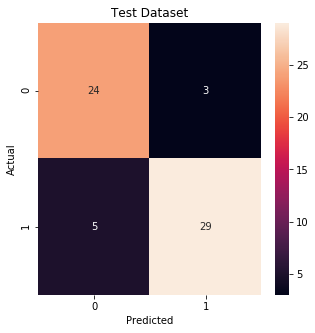

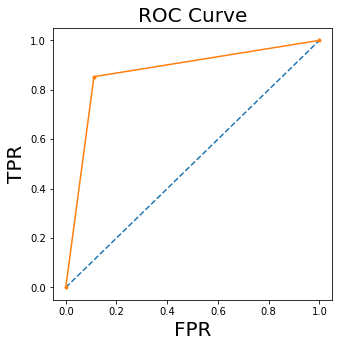

In [436]:
#Precision
print("Precision Score : ",precision_score(test_Y_onehot,pred_rforest_onehot))

#Recall
print("Recall Score : ",recall_score(test_Y_onehot,pred_rforest_onehot))

#Confusion Matrix
cm_rforest_onehot = confusion_matrix(test_Y_onehot,pred_rforest_onehot)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y_onehot,pred_rforest_onehot))
#Accuracy
print("Accuracy for Test: ",(cm_rforest_onehot[0,0] + cm_rforest_onehot[1,1])/
      (cm_rforest_onehot[0,0] + cm_rforest_onehot[1,1] + cm_rforest_onehot[0,1] + cm_rforest_onehot[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_rforest_onehot,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_rforest_train_onehot = model_rforest_onehot.predict(train_X_onehot)
cm = confusion_matrix(train_Y_onehot,pred_rforest_train_onehot)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y_onehot,pred_rforest_onehot)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **K Nearest Neighours - Normalized**

## Finding Optimal Parameters

### Setting up Parameters

In [441]:
parameters = {
            'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'p' : [1,2,3,4,5],
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [442]:
model_knn_grid = KNeighborsClassifier()
grid = GridSearchCV(model_knn_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_scaled,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Best Parameters

In [443]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=1,
           weights='uniform')

## Training the Model

In [459]:
model_knn_scaled = KNeighborsClassifier(n_neighbors= 10,metric = 'minkowski',p = 2)
model_knn_scaled.fit(train_X_scaled,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

## Prediction

In [462]:
pred_knn_scaled = model_knn_scaled.predict(test_X_scaled)

## Checking for Accuracy

Precision Score :  0.8823529411764706
Recall Score :  0.8823529411764706
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy for Test:  0.8688524590163934
Accuracy for Train:  0.871900826446281


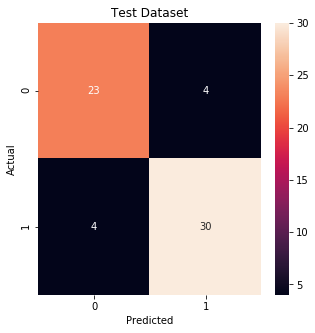

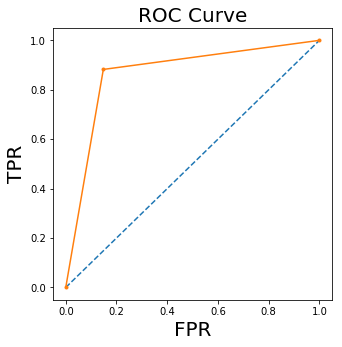

In [463]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_knn_scaled))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_knn_scaled))

#Confusion Matrix
cm_knn_scaled = confusion_matrix(test_Y,pred_knn_scaled)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_knn_scaled))
#Accuracy
print("Accuracy for Test: ",(cm_knn_scaled[0,0] + cm_knn_scaled[1,1])/
      (cm_knn_scaled[0,0] + cm_knn_scaled[1,1] + cm_knn_scaled[0,1] + cm_knn_scaled[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_knn_scaled,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_knn_train_scaled = model_knn_scaled.predict(train_X_scaled)
cm = confusion_matrix(train_Y,pred_knn_train_scaled)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y,pred_knn_scaled)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

# **K Nearest Neighobur - Categorical Variables**

## Finding Optimal Parameters

### Setting up Parameters


In [466]:
parameters = {
            'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'p' : [1,2,3,4,5],
}
scorer = make_scorer(accuracy_score)

### Performing Grid Search

In [468]:
model_knn_grid = KNeighborsClassifier()
grid = GridSearchCV(model_knn_grid, parameters,scoring = scorer,cv = 10)
grid = grid.fit(train_X_onehot,train_Y_onehot)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Best Parameters

In [470]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')

## Training the Model

In [483]:
model_knn_onehot = KNeighborsClassifier(n_neighbors= 5,metric = 'minkowski',p = 1)
model_knn_onehot.fit(train_X_onehot,train_Y_onehot)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')

## Prediction

In [484]:
pred_knn_onehot = model_knn_onehot.predict(test_X_onehot)

## Checking for Accuracy

Precision Score :  0.6410256410256411
Recall Score :  0.7352941176470589
Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.64      0.74      0.68        34

   micro avg       0.62      0.62      0.62        61
   macro avg       0.62      0.61      0.61        61
weighted avg       0.62      0.62      0.62        61

Accuracy for Test:  0.6229508196721312
Accuracy for Train:  0.8140495867768595


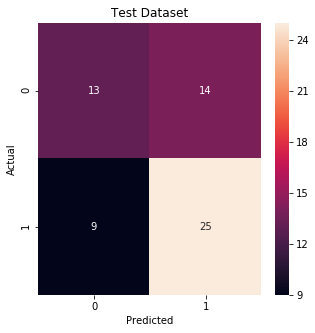

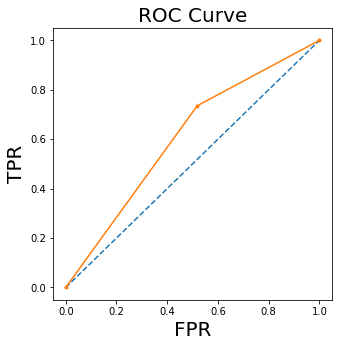

In [485]:
#Precision
print("Precision Score : ",precision_score(test_Y_onehot,pred_knn_onehot))

#Recall
print("Recall Score : ",recall_score(test_Y_onehot,pred_knn_onehot))

#Confusion Matrix
cm_knn_onehot = confusion_matrix(test_Y_onehot,pred_knn_onehot)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y_onehot,pred_knn_onehot))
#Accuracy
print("Accuracy for Test: ",(cm_knn_onehot[0,0] + cm_knn_onehot[1,1])/
      (cm_knn_onehot[0,0] + cm_knn_onehot[1,1] + cm_knn_onehot[0,1] + cm_knn_onehot[1,0]))

plt.rcParams['figure.figsize'] = 5,5
sns.heatmap(cm_knn_onehot,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_knn_train_onehot = model_knn_onehot.predict(train_X_onehot)
cm = confusion_matrix(train_Y_onehot,pred_knn_train_onehot)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
fpr,tpr,threshold = roc_curve(test_Y_onehot,pred_knn_onehot)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()